# Retinal Vessel Extraction using Sauvola and Niblack

## Dataset Description

This project uses the **DRIVE (Digital Retinal Images for Vessel Extraction) Dataset**.

Source:
https://www.kaggle.com/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction

In [3]:
!unzip /content/drive_dataset.zip


Archive:  /content/drive_dataset.zip
  inflating: DRIVE/test/images/01_test.tif  
  inflating: DRIVE/test/images/02_test.tif  
  inflating: DRIVE/test/images/03_test.tif  
  inflating: DRIVE/test/images/04_test.tif  
  inflating: DRIVE/test/images/05_test.tif  
  inflating: DRIVE/test/images/06_test.tif  
  inflating: DRIVE/test/images/07_test.tif  
  inflating: DRIVE/test/images/08_test.tif  
  inflating: DRIVE/test/images/09_test.tif  
  inflating: DRIVE/test/images/10_test.tif  
  inflating: DRIVE/test/images/11_test.tif  
  inflating: DRIVE/test/images/12_test.tif  
  inflating: DRIVE/test/images/13_test.tif  
  inflating: DRIVE/test/images/14_test.tif  
  inflating: DRIVE/test/images/15_test.tif  
  inflating: DRIVE/test/images/16_test.tif  
  inflating: DRIVE/test/images/17_test.tif  
  inflating: DRIVE/test/images/18_test.tif  
  inflating: DRIVE/test/images/19_test.tif  
  inflating: DRIVE/test/images/20_test.tif  
  inflating: DRIVE/test/mask/01_test_mask.gif  
  inflating: DR

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_sauvola, threshold_niblack


In [6]:
IMG_PATH = "/content/DRIVE/training/images"
GT_PATH  = "/content/DRIVE/training/1st_manual"

images = sorted(os.listdir(IMG_PATH))
masks  = sorted(os.listdir(GT_PATH))

print("Total images:", len(images))


Total images: 20


In [7]:
def preprocess(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(2.0, (8,8))
    enh = clahe.apply(gray)

    return enh


In [8]:
def sauvola_seg(img):

    th = threshold_sauvola(img, window_size=25)
    bin_img = img > th

    return (bin_img*255).astype(np.uint8)


In [9]:
def niblack_seg(img):

    th = threshold_niblack(img, window_size=25, k=-0.2)
    bin_img = img > th

    return (bin_img*255).astype(np.uint8)


In [10]:
def sensitivity(pred, gt):

    pred = pred > 0
    gt   = gt > 0

    TP = np.sum(pred & gt)
    FN = np.sum(~pred & gt)

    return TP / (TP + FN + 1e-8)


In [11]:
print("Processing...\n")

sau_scores = []
nib_scores = []

for i in range(20):

    img = cv2.imread(os.path.join(IMG_PATH, images[i]))
    gt  = cv2.imread(os.path.join(GT_PATH, masks[i]), 0)

    pre = preprocess(img)

    sau = sauvola_seg(pre)
    nib = niblack_seg(pre)

    sau_scores.append(sensitivity(sau, gt))
    nib_scores.append(sensitivity(nib, gt))


print("Done ✅")


Processing...

Done ✅


In [12]:
print("===== SENSITIVITY =====\n")

print("Sauvola Avg :", np.mean(sau_scores))
print("Niblack Avg :", np.mean(nib_scores))


===== SENSITIVITY =====

Sauvola Avg : 0.5965223898058097
Niblack Avg : 0.09676989821778147


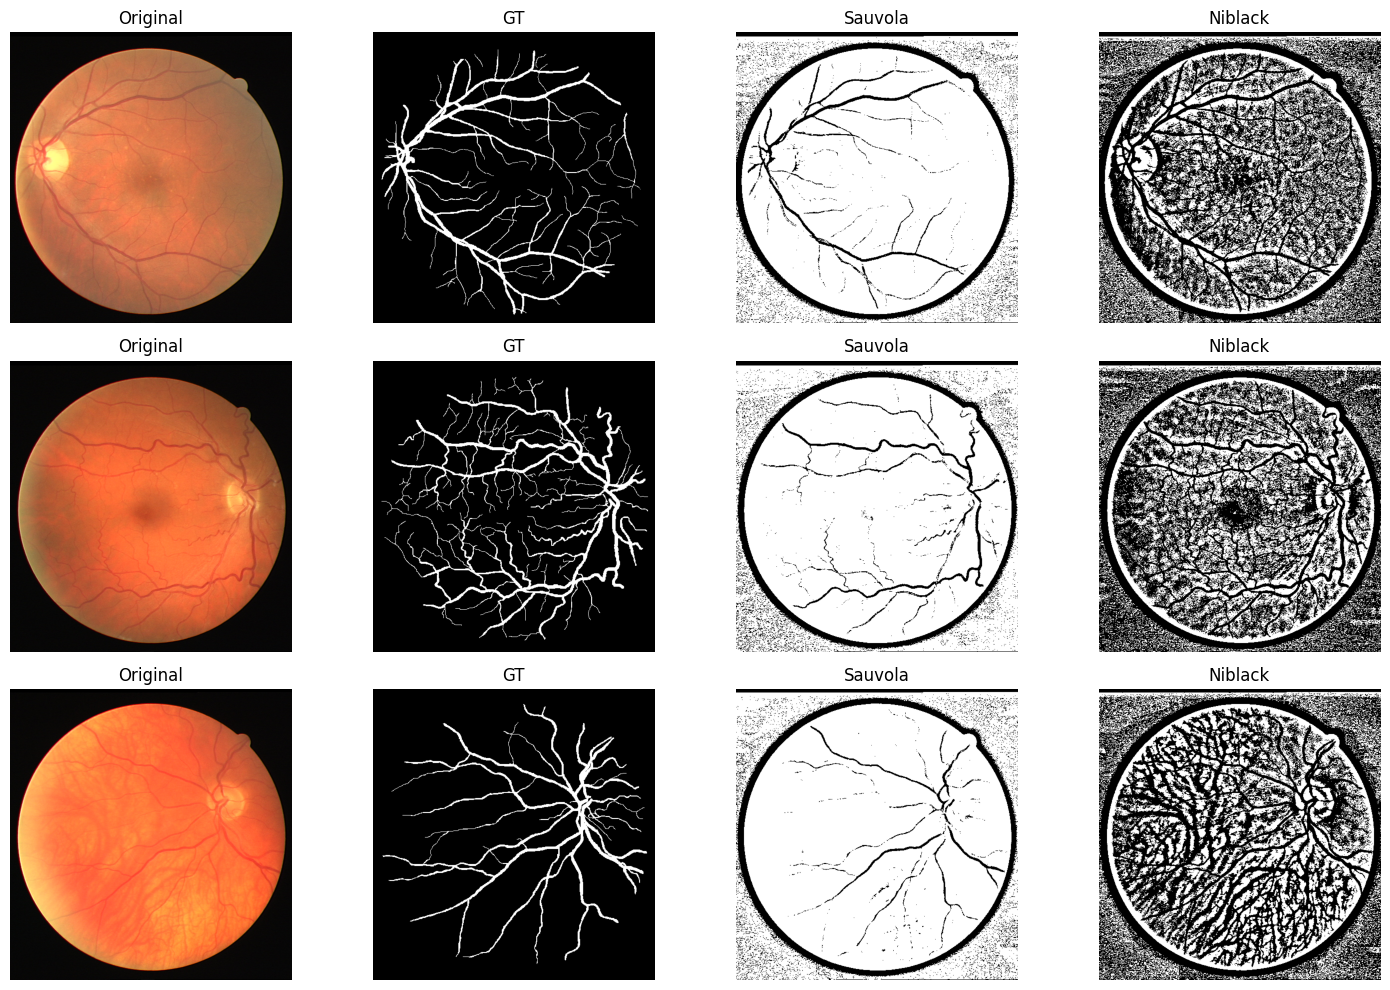

In [13]:
plt.figure(figsize=(15,10))

for i in range(3):

    img = cv2.imread(os.path.join(IMG_PATH, images[i]))
    gt  = cv2.imread(os.path.join(GT_PATH, masks[i]), 0)

    pre = preprocess(img)

    sau = sauvola_seg(pre)
    nib = niblack_seg(pre)

    plt.subplot(3,4,i*4+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(3,4,i*4+2)
    plt.imshow(gt, cmap="gray")
    plt.title("GT")
    plt.axis("off")

    plt.subplot(3,4,i*4+3)
    plt.imshow(sau, cmap="gray")
    plt.title("Sauvola")
    plt.axis("off")

    plt.subplot(3,4,i*4+4)
    plt.imshow(nib, cmap="gray")
    plt.title("Niblack")
    plt.axis("off")


plt.tight_layout()
plt.show()
